#    V.PRAVARSHA -221710304064 - CSE B4

## Problem Statement  

The problem that we are going to solve here is that given a set of features that describe whether a person is suffering from heart disease or not, our machine learning model must predicts whether the person is suffering from heart disease or not.The goal of this project is to build a model that can predict the probability of heart disease occurrence, based on a combination of features that describes the disease. In order to achieve the goal, we used data sets that was collected by Cleveland Clinic Foundation in Switzerland.

## Software and Libraries 

1. Python language was used in this project, with many of its libraries listed below:
2. Pandas: data analysis library Numpy: scientific computing library Sklearn: machine learning library Itertools: library contains functions for creating iterators to use for efficient looping Matplotlib: 2D plotting library Seaborn: statistical data visualization

## we will analyse the problem by using the 3 algorithms:
    1. Logistic Regression
    2. Gausian Naive Bayes
    3. K Neighbors Classifier

# Data Collection

To train our machine learning model with heart disease prediction data, we will be using prediction of heart diseases dataset https://www.kaggle.com/johnsmith88/heart-disease-dataset

## Description about the Data

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

# Attribute Information

Attribute Information:

age : age is the age of candidate

sex : Sex has numeric values. 0 denotes male and 1 denotes female.

chest pain type (4 values):Chest Pain pain has values between 0-3. The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack.

resting blood pressure :Resting blood pressure is normal pressure with no exercise.

serum cholestoral in mg/dl : Cholesterol means the blockage for blood supply in the blood vessels.

fasting blood sugar > 120 mg/dl:is blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.if the fasting blood sugar is below 120 mg/dl it is 0 and 1 if it is above.

resting electrocardiographic results (values 0,1,2):results means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening.

maximum heart rate achieved : The Maximum Heart Rate achieved.

exercise induced angina : Exercise induced angina is chest pain while exercising or doing any physical activity.

oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment.
ST Depression is the difference between value of ECG at rest and after exercise.

ST Slope is the tangent to the depression value.
1. Upsloping = 0
2. flat = 1
3. Downsloping =2 

number of major vessels (0-3) colored by flourosopy : The number of major blood vessels supplying blood to heart blocked.

thal: types of thalassemia
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

Heart diseases prediction where 1 denotes the person is suffering from Heart diseases and 0 means he is not suffering from heart diseases.

## Import Libraries

Let's first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib, For implementing Machine Learning models and processing of data,I will use the sklearn library.

In [36]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the Data 
Now some libraries which i need are imported, I can import the dataset and take a look at it. The dataset is stored in the file heart.csv. I'll use the pandas read_csv method to read the dataset.

In [37]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


The shape property is usually used to get the current shape of an array, but may also be used to reshape the array in-place by assigning a tuple of array dimensions to it.

In [38]:
data.shape

(1025, 14)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Exploratory Data Analysis: 

### Exploratory Data Analysis (EDA) 
EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like: – main features of data. – variables and relationships that hold between them. – identifying which variables are important for our problem.
It is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 

### 1. Stastistical Analysis

In [40]:
#checking the data type of any column
data.age.dtype

dtype('int64')

In [41]:
type(data.age[0])

numpy.int64

In [42]:
data.columns.value_counts()

restecg     1
ca          1
cp          1
sex         1
fbs         1
age         1
oldpeak     1
target      1
thal        1
slope       1
chol        1
trestbps    1
thalach     1
exang       1
dtype: int64

In [43]:
#checking for duplicate values
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


The dataset is now loaded into the variable data.  Before I  start processing and visualizing data, I'll just take a glimpse of the data using the desribe() and info() methods

In [44]:
print(data['sex'])

0       1
1       1
2       1
3       1
4       0
       ..
1020    1
1021    1
1022    1
1023    0
1024    1
Name: sex, Length: 1025, dtype: int64


In [45]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Looks like the dataset has a total of 1025 rows and there are no missing values. There are a total of 13 features along with one target value which we wish to find.

In [46]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature is different from each other and varied as well. While the maximum for age reaches 77, the maximum of serum cholestoral is 564.

In [47]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

## Analysis of Data using GroupBy() and Cmap

In [48]:
s= data.groupby(['sex','age'])['target'].count().reset_index().sort_values(by='target',ascending=False)
s.head(20).style.background_gradient(cmap='Purples')

,sex,age,target
59,1,58,47
58,1,57,45
60,1,59,43
53,1,52,40
55,1,54,38
45,1,44,30
57,1,56,29
52,1,51,27
65,1,64,25
61,1,60,24


This shows the total number of heart diseases that have occured for a particular age in case of males and females. In the top 20 count of heart diseases, Females have witnessed more heart attacks for their ages.

In [49]:
s= data.groupby(['sex','cp'])['target'].count().reset_index().sort_values(by='target',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,sex,cp,target
4,1,0,364
6,1,2,175
0,0,0,133
5,1,1,110
2,0,2,109
7,1,3,64
1,0,1,57
3,0,3,13


The Females having chest pain type 0 suffered the most heart attacks and type 2 the second highest. This trend is same for males.

In [50]:
s= data.groupby(['sex','trestbps'])['target'].count().reset_index().sort_values(by='target',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,sex,trestbps,target
46,1,120,98
54,1,130,83
60,1,140,76
40,1,110,54
15,0,130,40
50,1,125,38
66,1,150,31
21,0,140,31
10,0,120,30
52,1,128,29


The resting blood pressure and the cases of heart attack for such pressure in case of males and females.

In [51]:
s= data.groupby(['sex','chol'])['target'].count().reset_index().sort_values(by='target',ascending=True)
s.head(10).style.background_gradient(cmap='Blues')

,sex,chol,target
0,0,141,3
155,1,259,3
158,1,262,3
70,0,340,3
160,1,264,3
162,1,267,3
67,0,325,3
163,1,269,3
65,0,318,3
64,0,313,3


Generally males having high cholesterol had higher cases of heart attacks than females at the same Cholesterol.

In [52]:
s= data.groupby(['sex','fbs'])['target'].count().reset_index().sort_values(by='target',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,sex,fbs,target
2,1,0,602
0,0,0,270
3,1,1,111
1,0,1,42


This shows relation of Fasting blood sugar with heart attack in case of Male and Females.

In [53]:
s= data.groupby(['sex','ca'])['target'].count().reset_index().sort_values(by='target',ascending=False)
s.head(10).style.background_gradient(cmap='YlGnBu')

,sex,ca,target
4,1,0,374
0,0,0,204
5,1,1,177
6,1,2,89
7,1,3,55
1,0,1,49
2,0,2,45
8,1,4,18
3,0,3,14


The lower the number of vessels blocked, the higher were the heart disease cases. This means that 0 represents that all 4 major blood vessels were blocked and 4 represented all vessels were free for flow.

In [54]:
s= data.groupby(['sex','exang'])['target'].count().reset_index().sort_values(by='target',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,sex,exang,target
2,1,0,442
3,1,1,271
0,0,0,238
1,0,1,74


Exercise induced chest pain was higher in males and more resulted in Heart attacks.

In [55]:
s= data.groupby(['sex','thal'])['target'].count().reset_index().sort_values(by='target',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,sex,thal,target
7,1,3,357
6,1,2,292
2,0,2,252
5,1,1,60
3,0,3,53
1,0,1,4
4,1,0,4
0,0,0,3


The higher the Thalassemia type, the higher were the cases of heart disease.

## 2. Understanding the data by summarizing their main characteristics  often plotting them visually

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

We can do visualizations using many libraries. Here i used some libraries like  
   1. Matplotlib: low level, provides lots of freedom 
   2. Pandas Visualization: easy to use interface, built on Matplotlib
   3. Seaborn: high-level interface, great default styles

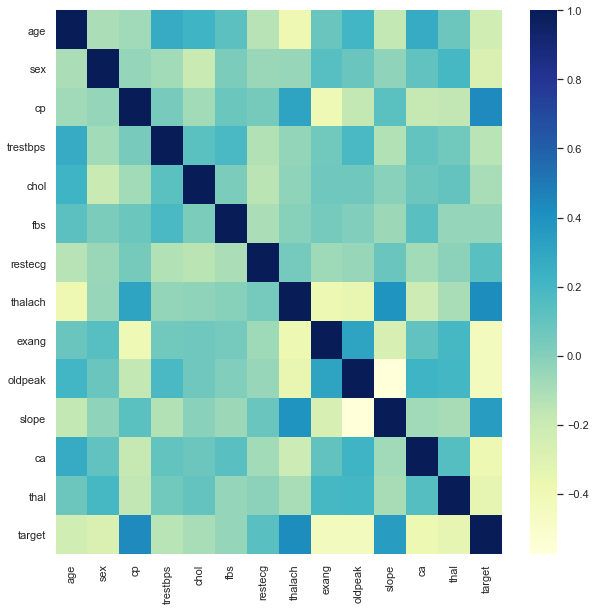

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap='YlGnBu')

Taking a look above some features have negative correlation with the target value while some have positive correlation too.

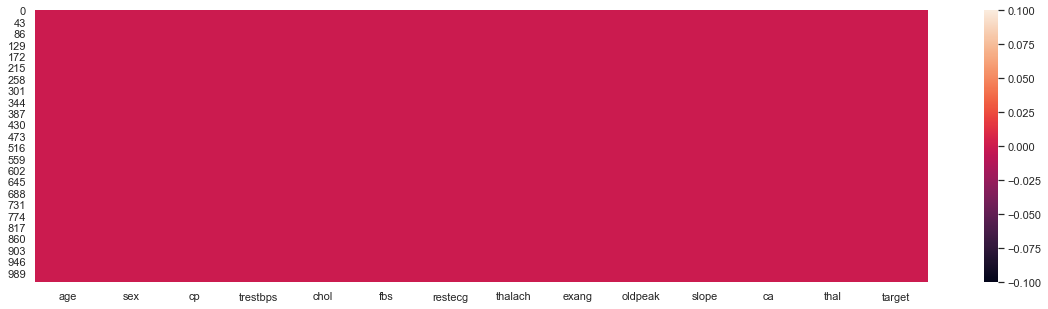

In [57]:
##visualizing the missing values with heatmap
sns.heatmap(data.isna())

so in the above heatmap of the data we can find there are no missing values for all the attributes , that is the reason we can find the whole heatmap in pink color.

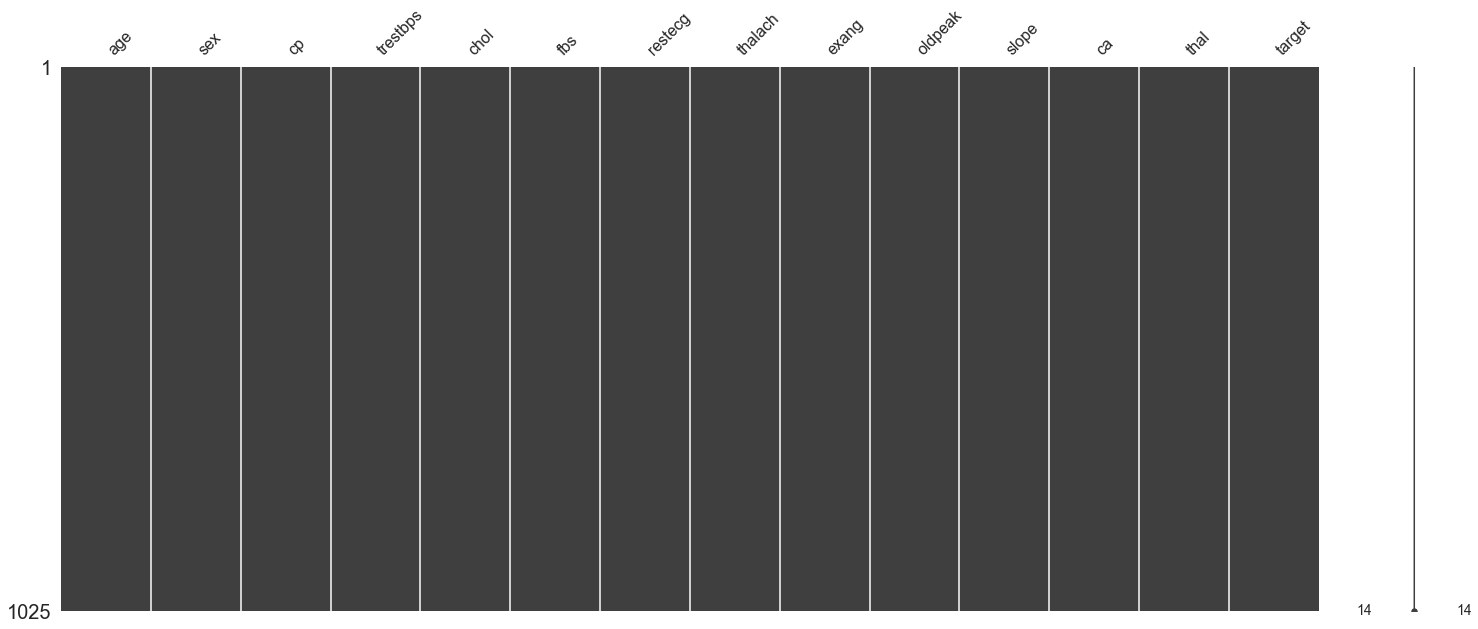

In [58]:
import missingno as msno
msno.matrix(data)

This is the matrix plot of missing numbers where we could find no missing values for all the available features or attributes of the given data set

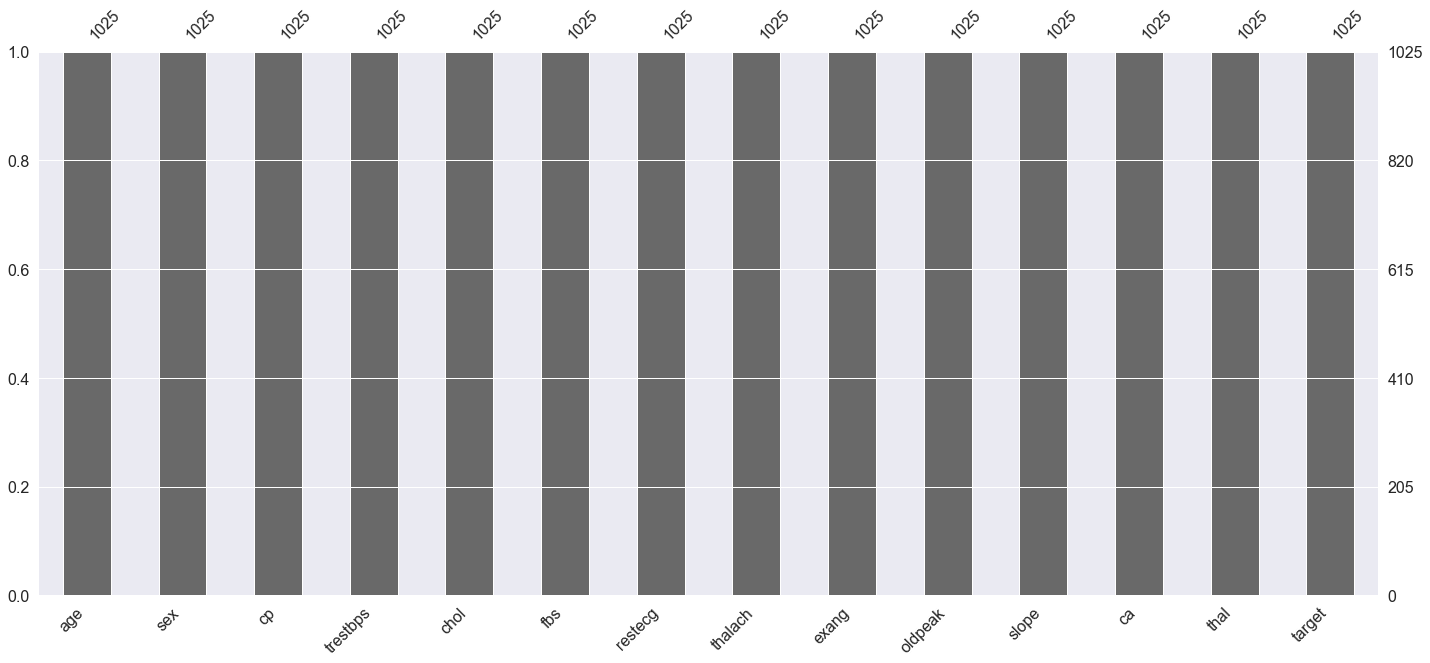

In [59]:
msno.bar(data)

The above graph we can see there are no missing values and this is a bar graph of missing data values of the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cf653d0>,
      dtype=object)

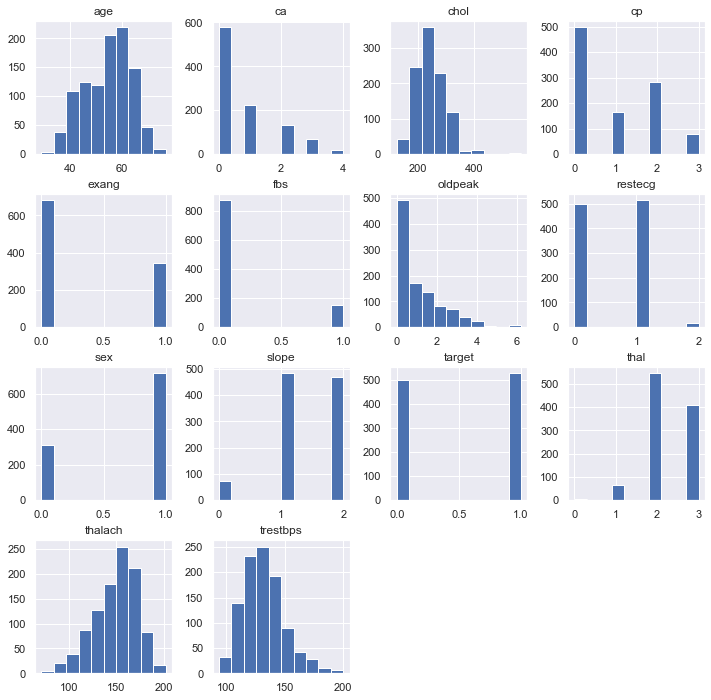

In [60]:
data.hist(figsize=(12,12))

In the above histograms i can see each feature having different distributions. Thus, using scaling before our predictions should be of great use for normalizing data within range and speeding up of calculations in an algorithm.

Also, the categorical features do stand out.It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same. 

## Univariate Data Analysis

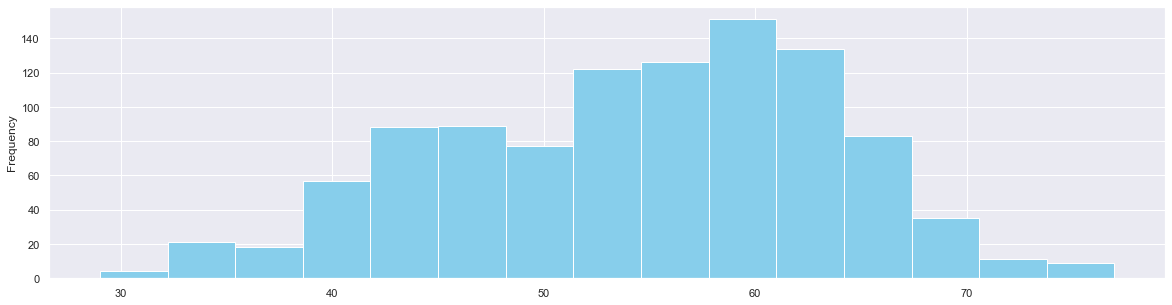

In [61]:
sns.set(rc={'figure.figsize':(20,5)})
data['age'].plot.hist(bins = 15, color = 'skyblue')

### Majority of people get heart attack around the age 55-65.

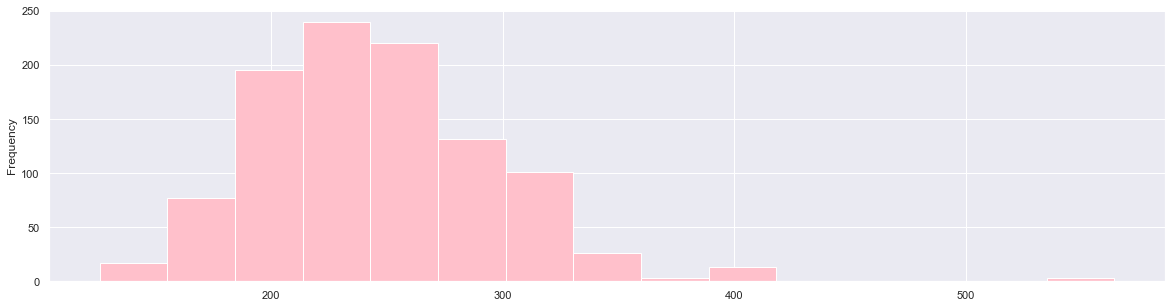

In [62]:
sns.set(rc={'figure.figsize':(20,5)})
data['chol'].plot.hist(bins = 15,color = 'pink')

### The span of cholestrol in the case study , have an average value of 120-140.

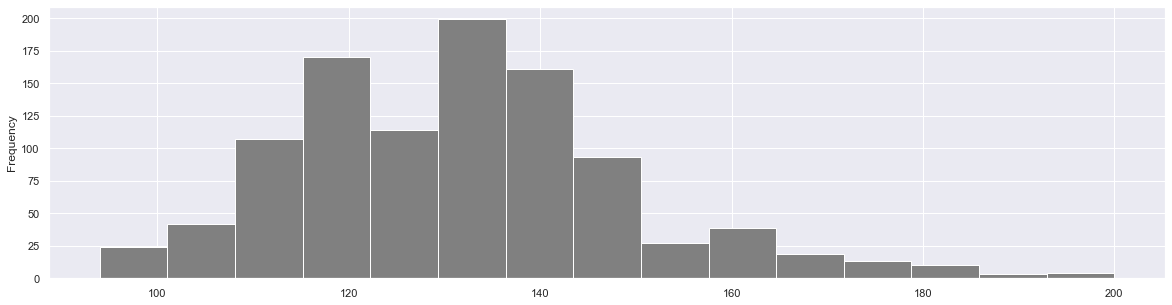

In [63]:
data['trestbps'].plot.hist(bins = 15, color = 'grey')

### The resting blood pressure lies between 120 - 140 at a frequency of 125 to 200 for the resting blood feature of the given data.

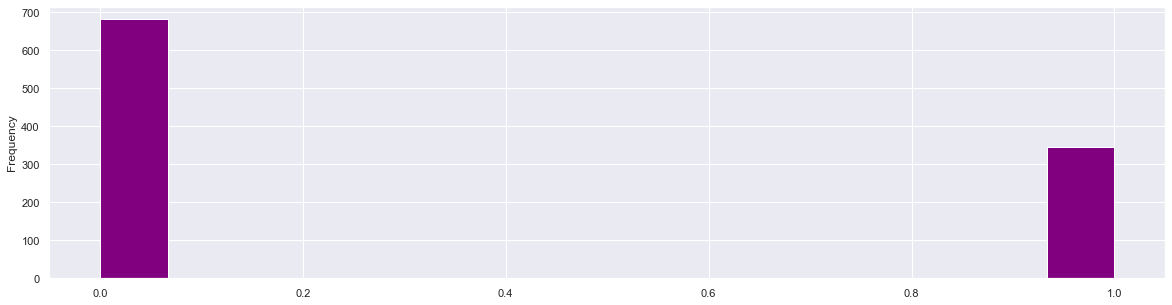

In [64]:
data['exang'].plot.hist(bins=15, color = 'purple')

### The people who are suffering from exercise induced angina are half of the people who are not suffering from the exercise induced angina for the given dataset. As  the people who are suffering are less hence people affected with exercise induces angina may be less.

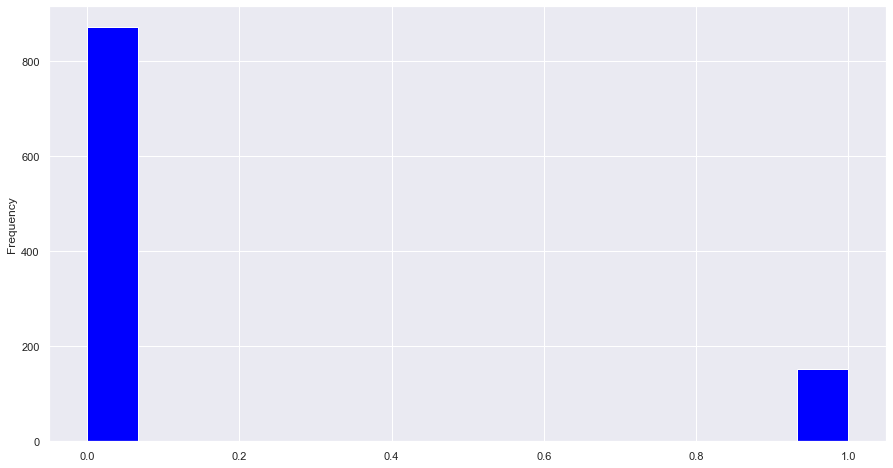

In [160]:
data['fbs'].plot.hist(bins=15, color = 'blue')

People who are having fasting blood sugar less than 120 mg/dl are less than the people who are suffering from fasting blood sugar.

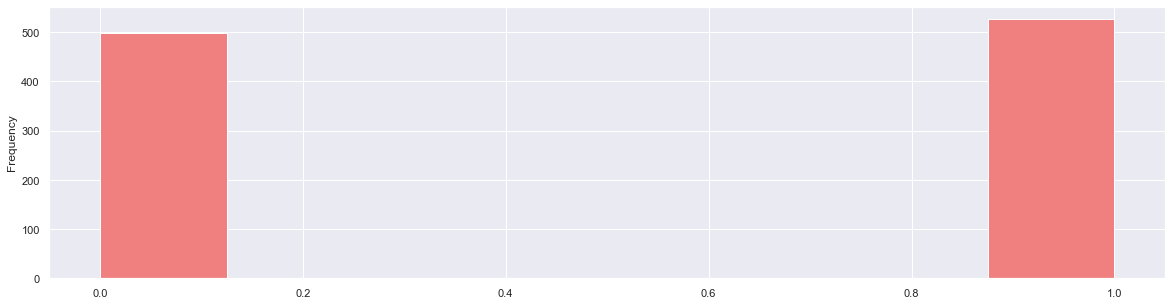

In [65]:
data['target'].plot.hist(bins = 8, color = 'lightcoral')

### The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data. So these are told as balanced  data.

# Bivariate Analysis

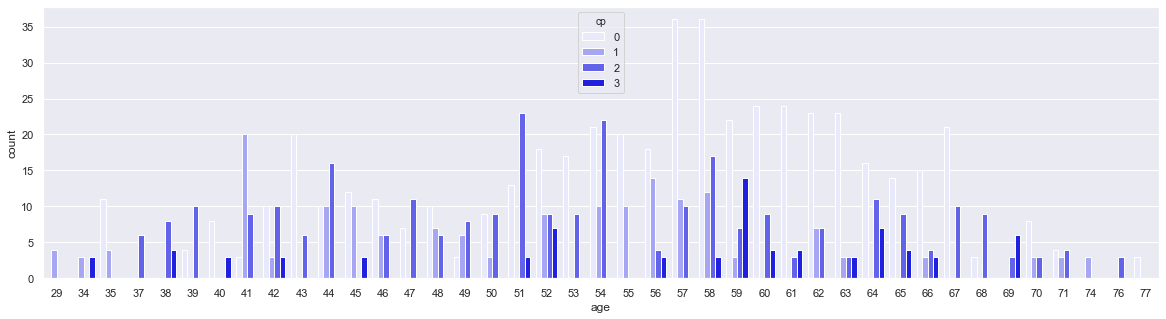

In [66]:
sns.countplot(x = 'age',hue = 'cp', data = data, color = 'blue')

### The type of chest pains vary from one age group to other age group . hence also varies from person to person.
### The dependence of Chest pain on Age.
As we can see ,
    1. Type 0 was maximum at the age of 57 & 58.
    2. Type 1 was maximum at an age of 41.
    3. Type 2 was maximum at an age of 51.
    4. Type 3 was maximum at an age of 59.

## The dependence of Fasting blood sugar on age

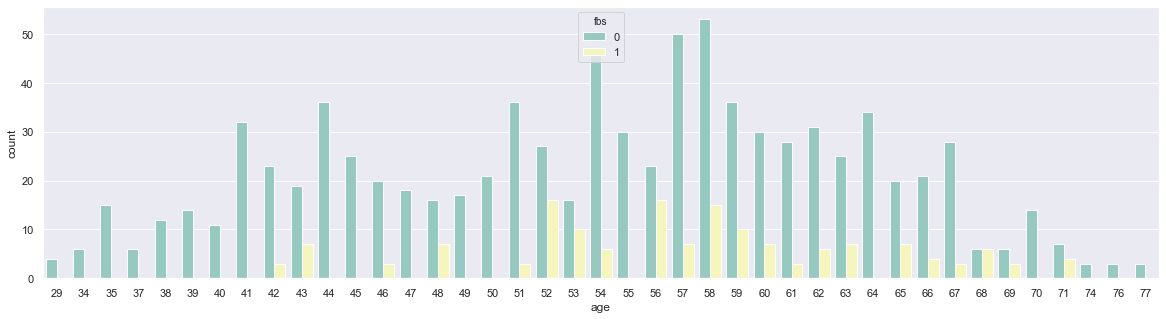

In [67]:
sns.countplot(x = 'age',hue = 'fbs', data = data,palette="Set3")

In the above graph we can see that, people who are suffering from fasting blood sugar are comparatively less.
      * People who are not suffering from fasting blood sugar will have fbs value below 120 mg/dl .
      * People who are suffering from fasting blood sugar will have fbs value above 120 mg/dl .
Hence, people who are between age of 51 to 60 are having fbs value above 120 mg/dl. Hence they are suffering more.

## The dependence of Exercise Induced Angina on age

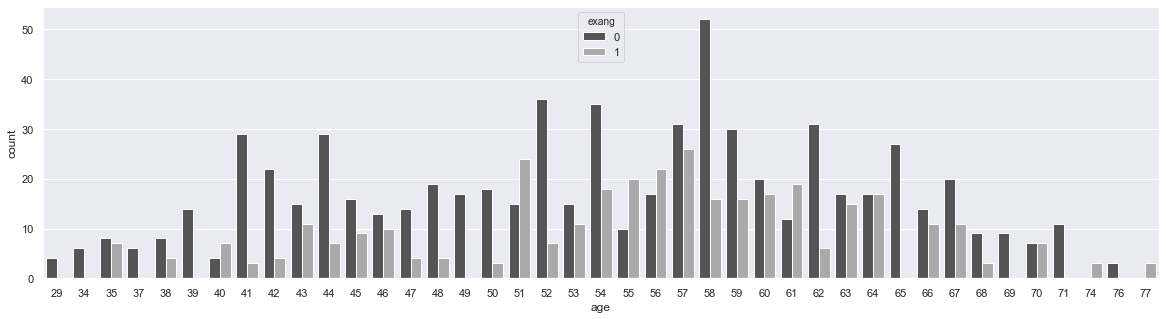

In [68]:
sns.countplot(x = 'age',hue = 'exang', data = data ,palette="gray")

The number of people who suffered from exercise induced angina are from the early ages to declining ages . 
hence people who suffered maximum are between the age group of 51 - 60. 

- The people who suffered maximum exercise induced angina was at age  57 and also the people who suffered minimum exercise induced angina was at age 41,50,68,74 and 77 too.

- Also,some people have not put up with exercise induced angina problem.

## The dependence of result of ST Slope on age.

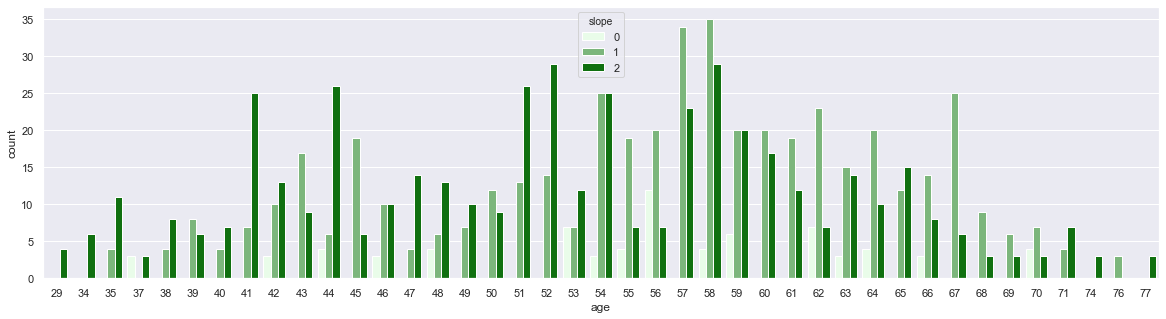

In [69]:
sns.countplot(x = 'age',hue = 'slope', data = data, color = "green")

These are three types.
     1. Upsloping = 0  better heart rate with excercise (uncommon)
     2. flat = 1  minimal change (typical healthy heart)
     3. Downsloping =2 signs of unhealthy heart
- The people who are having upsloping are more between age group of 53 - 59 and minimum at age of 37,46,54,63,66.
- the people who are suffering from flat sloping are more at a age group of 50 to 67 and minimum at an age of 76.
- the people who are suffering from downsloping are maximum at the age of 52 and 58 and minimum was at 37,68,69,70,74,77.

### The dependence of result of Target on age.

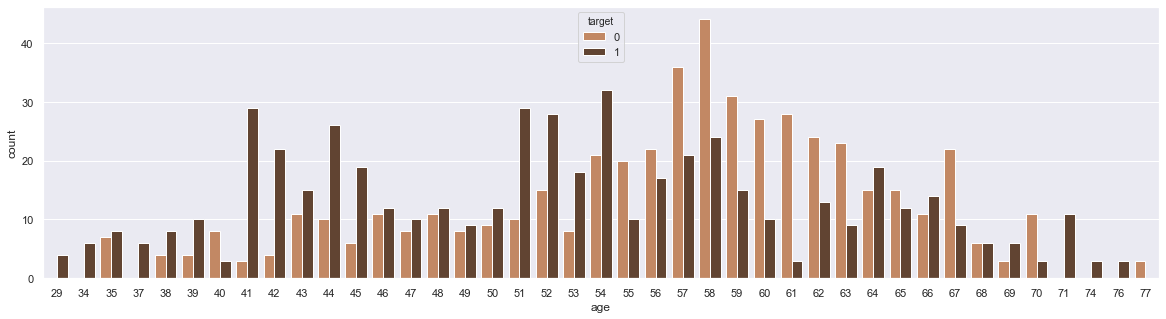

In [70]:
sns.countplot(x = 'age',hue = 'target', data = data, palette = 'copper_r')

The number of people who are not suffering are more than people who are suffering from heart diseases.
- hence the the people who are suffering from heart diseases are more at a age group of 50 to 65.
- The people who are not suffering from heart diseases are more at a age group of 40-66.

## 3. Visualize data to help detect relevant relationships between variables/columns 

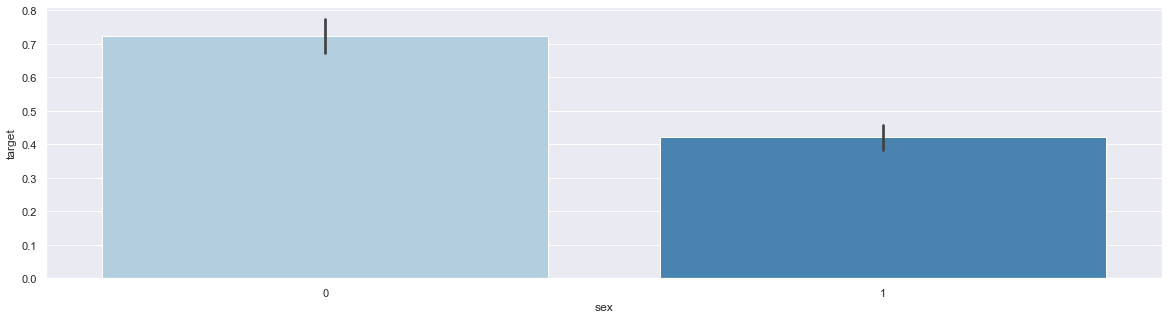

In [71]:
sns.barplot(data["sex"],data["target"],palette = 'Blues')

### We notice, that males are more likely to have heart problems than females.

## Heart Disease Frequency for male and female

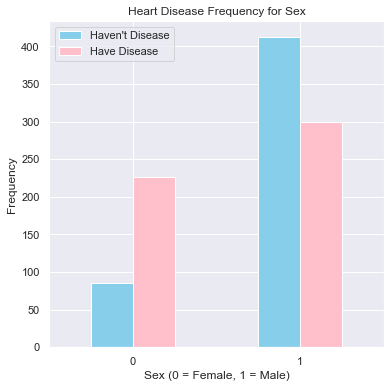

In [72]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(6,6),color=['skyblue','pink'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

So from the above graph we can clearly see that females are having less heart diseases than male. In female graph, no of female with heart diseases are more than no of female having no heart diseases.In male graph, no of male with heart diseases are less than no of male having no heart diseases.

## Thalassemia vs cholesterol

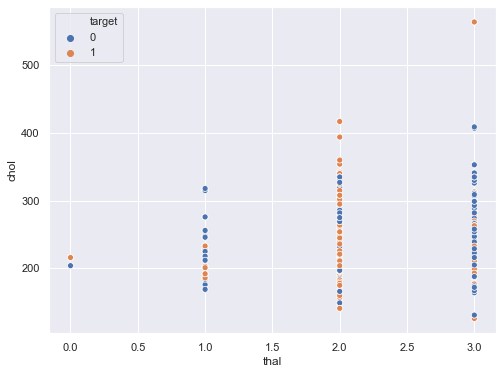

In [73]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='thal',y='chol',data=data,hue='target')
plt.show()

With the rise of the cholestrol the rate of thalasemia also increases from person to person.

# Thalassemia vs resting blood sugar

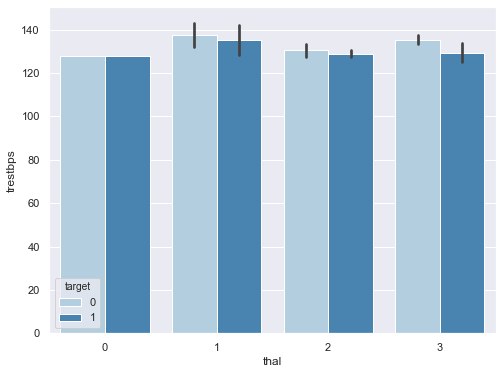

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(x='thal',y='trestbps',data=data,hue='target',palette='Blues')
plt.show()

Here it shows that thalassemia is of 4 types . 
- The number of people who are suffering from type 0 are equal to number of people who are not suffering.
- The number of persons suffering type 1, type 2 and type 3 are less than the number of persons who are not suffering.
- hence we can notice that with the rise in the trestbps the thalassemia also increases.

# Major vessels vs cholestrol

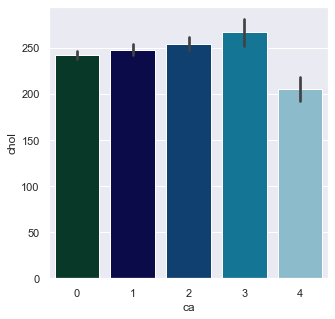

In [158]:
plt.figure(figsize=(5,5))
sns.barplot(data["ca"],data["chol"],palette = 'ocean')
plt.show()

In the above graph we can clearly see that,if the cholestral is more then the ca(Number of major vessels (0-3) colored by Flouroscopy ) is also more

# Target vs Cholestrol

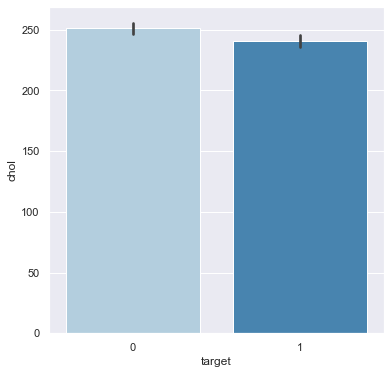

In [76]:
plt.figure(figsize=(6,6))
sns.barplot(data["target"],data["chol"],palette='Blues')
plt.show()

People who are not having cholestrol are more than people who are having cholestrol.

# Sex vs Cholestrol

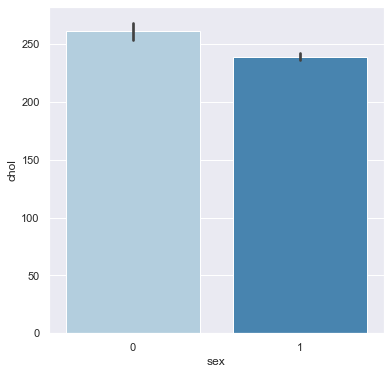

In [157]:
plt.figure(figsize=(6,6))
sns.barplot(data["sex"],data["chol"],palette='Blues')
plt.show()

No of Male having cholestrol are more than no of female. 

#   Target vs Exang

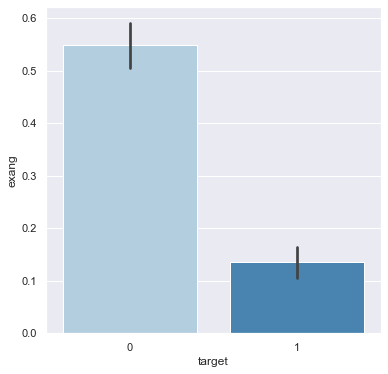

In [78]:
plt.figure(figsize=(6,6))
sns.barplot(data["target"],data["exang"],palette='Blues')
plt.show()

people who are having exercise induced angina are very less.

# Target vs Oldpeak

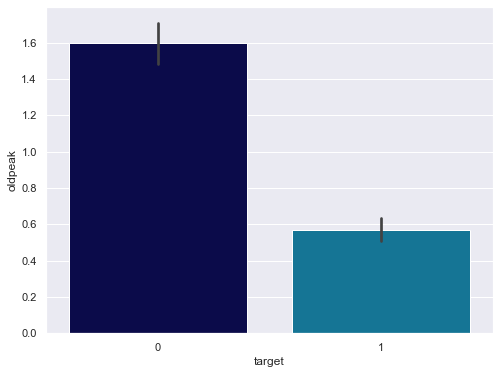

In [79]:
plt.figure(figsize=(8,6))
sns.barplot(data["target"],data["oldpeak"],palette='ocean')
plt.show()

People not suffering from ST depression induced by exercise relative to rest are more than people suffering from ST depression induced by exercise relative to rest

## chol vs Old peak

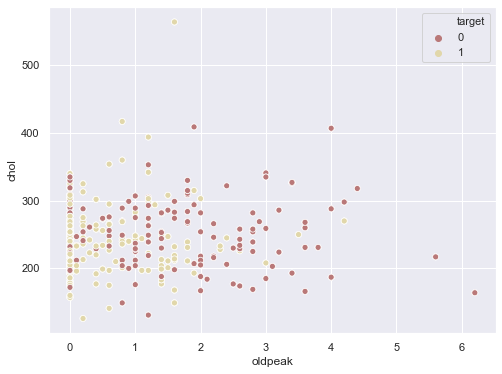

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='oldpeak',y='chol',data=data,hue='target',palette='pink')
plt.show()

People suffering from cholestrol between 200 to 300 are also suffering from the old peak.

## Fasting Blood sugar Data

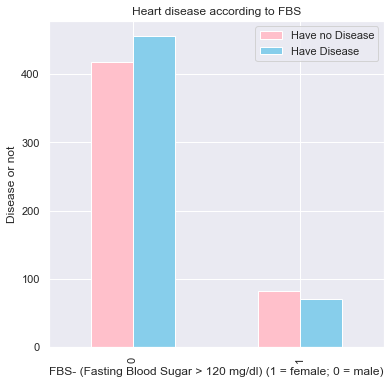

In [81]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(6,6),color=['pink','skyblue'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = female; 0 = male)')
plt.xticks(rotation=90)
plt.legend(["Have no Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

The overall graphical analysis shows that females tend to suffer less from heart attack and that men have a higher chances of getting struck by a heart attack.
Men don't have a defined age span that they are safe from heart attack. Men below 30 also suffered from heart attack which wasn't the case with women. This shows men have to be more careful with their health conditions and situations.

# Machine Learning

Let us now import train_test_split to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

1. Split the dataset into input and output--> Train and test
2. Train--> Building the model
3. Test--> How well the model has learnt(Generaize on unseen data)

In [82]:
# Preparing Input and Output
X = data.drop(['target'], axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [83]:
#Now let us access the output column

In [84]:
y = data.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Preparing Training and Testing Data
 Storing 70% of the data into training and remaining 30% of the data into testing

In [85]:
# Preparing Training and Testing Data
# Storing 70% of the data into training and remaining 30% of the data into testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=2)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(717, 13)
(308, 13)
(717,)
(308,)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
402,70,1,1,156,245,0,0,143,0,0.0,2,0,2
581,44,1,2,140,235,0,0,180,0,0.0,2,0,2
557,48,1,0,122,222,0,0,186,0,0.0,2,0,2
633,61,1,0,138,166,0,0,125,1,3.6,1,1,2
819,58,0,0,170,225,1,0,146,1,2.8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,52,1,1,120,325,0,1,172,0,0.2,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
584,55,1,0,132,353,0,1,132,1,1.2,1,1,3
493,55,1,0,132,353,0,1,132,1,1.2,1,1,3


# Logistic regression

Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [87]:
# Build the classifier on training data
# Sklearn library: import, instantiate, fit
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()  # Creating object for Logistic Regression class
reg.fit(X_train, y_train) # Input and Output will be passed to the fit method

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
# Predicting on train data  
# Syntax: objectName.predict(Input)
y_train_pred = reg.predict(X_train)
y_train_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,

In [89]:
y_train== y_train_pred # Comparing actual values and predicted values

402    True
581    True
557    True
633    True
819    True
       ... 
299    True
534    True
584    True
493    True
527    True
Name: target, Length: 717, dtype: bool

### CONFUSION MATRIX 

A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

In [90]:
# Confusion matrix for training data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf

array([[266,  69],
       [ 35, 347]])

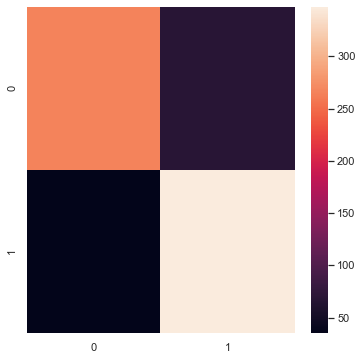

In [91]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred))
plt.show()

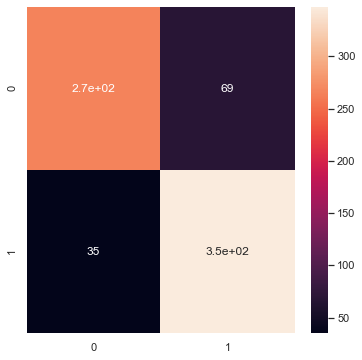

In [92]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)
plt.show()

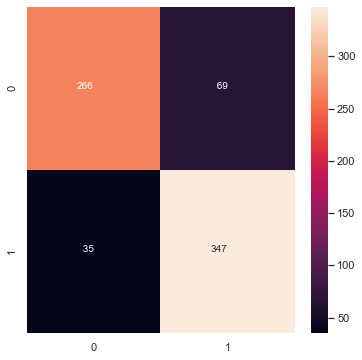

In [93]:
# supported values for ha are : 'center', 'right', 'left'
# supported values for va are : 'top', 'bottom', 'center', 'baseline', 'center_baseline
# fmt can also be given as d(integer formatting)
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})
plt.show()

In [94]:
conf

array([[266,  69],
       [ 35, 347]])

In [95]:
print('true_negative=', conf[0][0])
print('false_positive=', conf[0][1])
print('false_negative=', conf[1][0])
print('true_positive=',  conf[1][1])

true_negative= 266
false_positive= 69
false_negative= 35
true_positive= 347


In [96]:
## Accuracy--> TP+TN/TP+FP+TN+FN
## Correct Predictions/ Total Number of Predictions
(266+347)/(347+69+35+266)

0.8549511854951185

In [97]:
# Calculating Accuracy: Syntax:- ccuracy_score(actualValues, predictedValues)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.8549511854951185

In [98]:
#prediction on Test data
# Syntax: objectName.predict(Input)
y_test_pred = reg.predict(X_test)
y_test_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [99]:
y_test== y_test_pred # Comparing actual values and predicted values

546    True
980    True
908    True
577    True
846    True
       ... 
13     True
248    True
934    True
522    True
659    True
Name: target, Length: 308, dtype: bool

In [100]:
# Confusion matrix for testing data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)
conf

array([[125,  39],
       [  9, 135]])

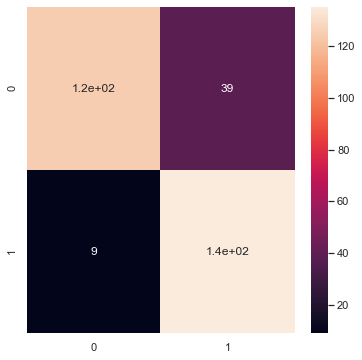

In [101]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.show()

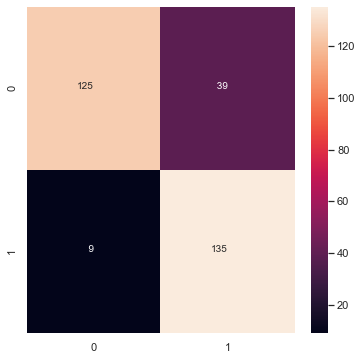

In [102]:
# supported values for ha are : 'center', 'right', 'left'
# supported values for va are : 'top', 'bottom', 'center', 'baseline', 'center_baseline
# fmt can also be given as d(integer formatting)
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})
plt.show()

In [103]:
conf

array([[125,  39],
       [  9, 135]])

In [104]:
print('true_negative=', conf[0][0])
print('false_positive=', conf[0][1])
print('false_negative=', conf[1][0])
print('true_positive=',  conf[1][1])

true_negative= 125
false_positive= 39
false_negative= 9
true_positive= 135


In [105]:
## Accuracy--> TP+TN/TP+FP+TN+FN
## Correct Predictions/ Total Number of Predictions
(125+135)/(125+39+9+135)

0.8441558441558441

In [106]:
# Calculating Accuracy: Syntax:- ccuracy_score(actualValues, predictedValues)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.8441558441558441

In [107]:
score_lr=accuracy_score(y_test, y_test_pred)

ROC Curve- Receiver Operating Characteristics
ROC curves typically feature true positive rate on Y axis and false positive rate on X axis.
The "steepness" of ROC curves is also important 

In [109]:
# Roc curve
## TPR, FPR, Threshold
from sklearn.metrics import roc_auc_score, roc_curve
m_prob = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, m_prob)

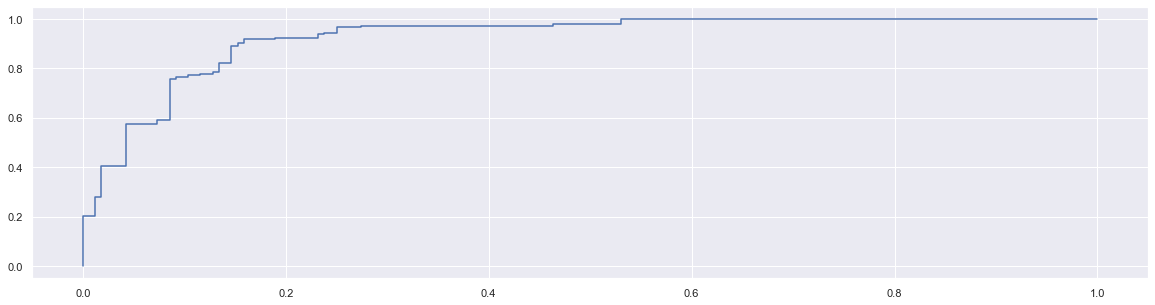

In [110]:
plt.plot(fpr,tpr)

In [112]:
roc_auc_score(y_test,y_test_pred)

0.8498475609756098

# Gausian Naive Bayes Algorithm

Naive Bayes Classifier. Naive Bayes is a kind of classifier which uses the Bayes Theorem. It predicts membership probabilities for each class such as the probability that given record or data point belongs to a particular class.

Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as 
1. spam filtering 
2. text classification 
3. sentiment analysis and recommender systems. 

It uses Bayes theorem of probability for prediction of unknown class.

Let us apply the Gausian Naive Bayes algorithm . 

In [113]:
#Apply the Naive Bayes Algorithm
#Import BernNB
from sklearn.naive_bayes import BernoulliNB

# creating an object for BerNB
model_BernNB = BernoulliNB()

In [114]:
# Applying the Algorithm to the data
# ObjectName.fit(Input, Output)
 
model_BernNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [115]:
y_train_pred = model_BernNB.predict(X_train)

### Confusion matrix 
A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

In [116]:
# Compare the actual values(y_train) with predicted values(y_train_pred)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train, y_train_pred)

array([[266,  69],
       [ 49, 333]])

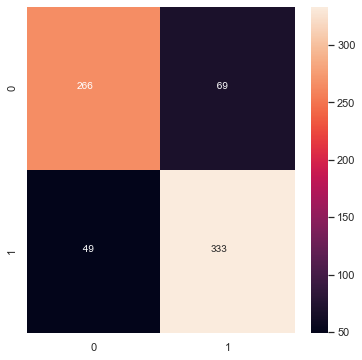

In [117]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})
plt.show()

In [118]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       335
           1       0.83      0.87      0.85       382

    accuracy                           0.84       717
   macro avg       0.84      0.83      0.83       717
weighted avg       0.84      0.84      0.83       717



In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8354253835425384

In [120]:
# Applying the Algorithm to the data
# ObjectName.fit(Input, Output)

model_BernNB.fit(X_test, y_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [121]:
# Prediction on Test Data
# Syntax: objectname.predict(InputValues)
y_test_pred = model_BernNB.predict(X_test)

In [122]:
# Compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_test_pred)

array([[131,  33],
       [ 26, 118]])

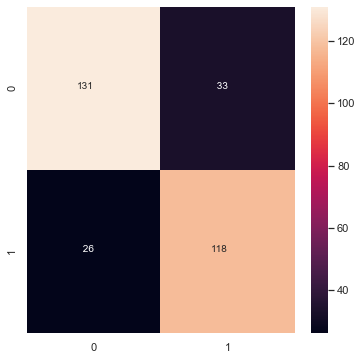

In [123]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True , fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})
plt.show()

In [124]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       164
           1       0.78      0.82      0.80       144

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.81      0.81      0.81       308



In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.8084415584415584

In [126]:
score_nb=accuracy_score(y_test,y_test_pred)

In [127]:
# Roc curve
## TPR, FPR, Threshold
from sklearn.metrics import roc_auc_score, roc_curve
prob = model_BernNB.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, prob)

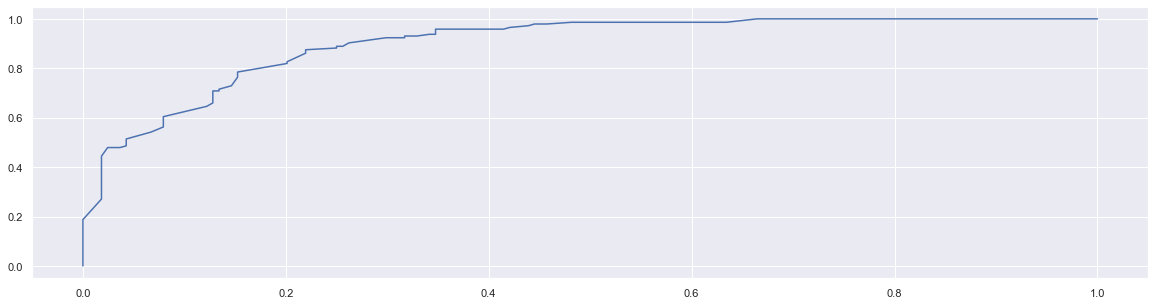

In [128]:
plt.plot(fpr,tpr)

In [129]:
roc_auc_score(y_test,y_test_pred)

0.8091124661246613

## K Neighbors Classifier

KNN also known as K-nearest neighbour is a supervised and pattern classification learning algorithm which helps us find which class the new input(test value) belongs to when k nearest neighbours are chosen and distance is calculated between them.

Before Splitting if you apply standardization--> you are considering whole you are including test data also into training data

In [130]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train

#Scaling for test data
#Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.724067,0.667506,-0.917780,-0.097631,1.578108,-0.421117,-1.020076,-1.738569,-0.698249,1.117144,-0.659898,2.194045,-0.512999
1,0.286805,0.667506,-0.917780,0.478989,-1.070495,-0.421117,0.855294,-0.051347,-0.698249,-0.568091,-0.659898,-0.713774,-2.126244
2,0.839598,0.667506,-0.917780,-0.674252,0.457545,-0.421117,0.855294,-2.171190,1.432154,0.611574,-0.659898,1.224772,1.100247
3,1.724067,0.667506,-0.917780,-0.097631,1.578108,-0.421117,-1.020076,-1.738569,-0.698249,1.117144,-0.659898,2.194045,-0.512999
4,-2.145485,-1.498113,-0.917780,0.363665,-1.253859,-0.421117,0.855294,1.419564,-0.698249,0.274526,0.960467,-0.713774,-0.512999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,-0.376547,0.667506,-0.917780,0.478989,1.089135,-0.421117,0.855294,-1.176162,1.432154,2.633856,-0.659898,2.194045,1.100247
304,-1.703250,-1.498113,1.061313,0.363665,-0.500026,-0.421117,0.855294,0.121701,-0.698249,-0.905138,-0.659898,-0.713774,-0.512999
305,-1.371575,0.667506,1.061313,-0.097631,-1.314981,-0.421117,0.855294,0.035177,-0.698249,-0.905138,0.960467,-0.713774,-0.512999
306,1.392391,-1.498113,1.061313,1.170935,0.661284,-0.421117,0.855294,0.986943,-0.698249,-0.905138,0.960467,0.255499,-0.512999


In [131]:
# Model Building:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [132]:
# Predictions on the data
## predict function--> gives the predicted values 
## Syntax:objectname.predict(Input)

In [133]:
##Predictions on the data
##predict function gives the predicted values
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,

In [134]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       335
           1       0.83      0.91      0.86       382

    accuracy                           0.85       717
   macro avg       0.85      0.84      0.85       717
weighted avg       0.85      0.85      0.85       717



### Let us Check for optimum k-value and build the models with multiple k values

In [135]:
from sklearn.metrics import accuracy_score
scores=[]
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores

[0.9772727272727273,
 0.9285714285714286,
 0.8928571428571429,
 0.8798701298701299,
 0.8311688311688312,
 0.8409090909090909,
 0.8701298701298701,
 0.8603896103896104,
 0.8733766233766234,
 0.8733766233766234,
 0.8571428571428571,
 0.8701298701298701,
 0.8603896103896104,
 0.8506493506493507,
 0.8603896103896104,
 0.8636363636363636,
 0.8538961038961039,
 0.8538961038961039,
 0.8733766233766234,
 0.8603896103896104]

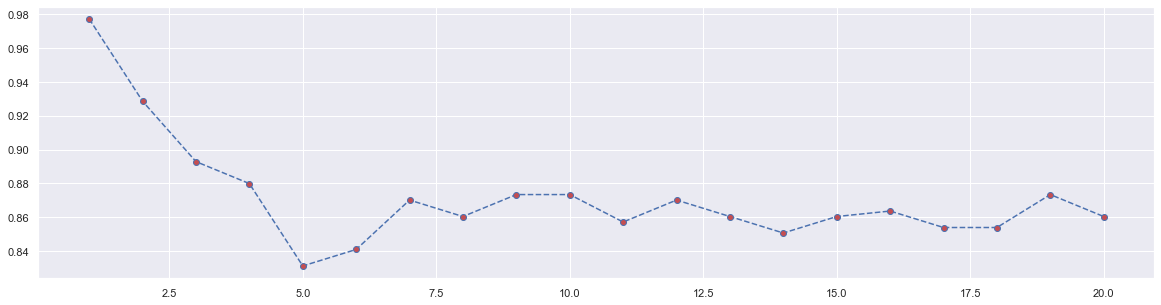

In [136]:
# Plot of K values and Scores
plt.plot(range(1,21), scores, marker='o', markerfacecolor='r', linestyle='--')

In the above graph in range() function we included upto 20 values and we got the optimum value of k in the above graph as 1

In [137]:
final_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
final_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [138]:
# Prediction on  training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,

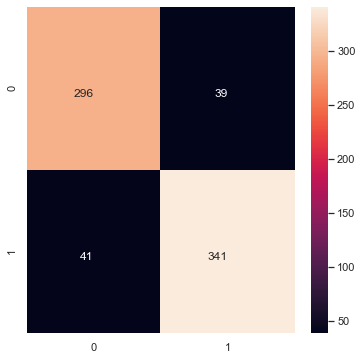

In [139]:
# Confusion Matrix of Training data
#Syntax: confusion_matrix(ActualValues, Predicted Values)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train, final_train_pred), annot=True, 
            fmt='d', annot_kws={'va':'top','ha':'right'}) # d--> integer formatting
plt.show()

In [140]:
# Classification report for training Data
# Precision--> PPV--> Out of the positive predicted values, how many truely positive
print(classification_report(y_train, final_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       335
           1       0.90      0.89      0.90       382

    accuracy                           0.89       717
   macro avg       0.89      0.89      0.89       717
weighted avg       0.89      0.89      0.89       717



In the classification report above we got the accuracy as 0.89

In [141]:
# Predictions on Test Data
final_test_pred = final_model.predict(scaled_X_test)  # y_test
final_test_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,

 ### Next let us Compare actual values of test data(y_test) and final_test_pred(model predicted values)
        Confusion_matrix(actualValues, predictedValues)

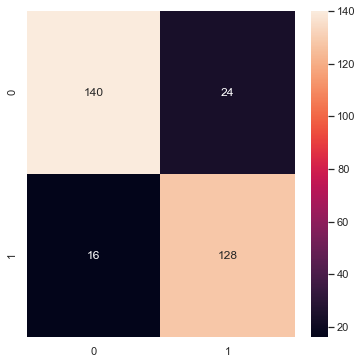

In [142]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, final_test_pred), annot=True, fmt='d')
plt.show()

In [143]:
# Classification Report for Test Data
print(classification_report(y_test, final_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       164
           1       0.84      0.89      0.86       144

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



from the above classification report we got the values of precision ,recall ,support and accuray.
he in the above report we got the accuracy as 0.87

In [144]:
predicted_acc_test=accuracy_score(y_test, final_test_pred)  
predicted_acc_test

0.8701298701298701

In [145]:
predicted_acc_test=accuracy_score(y_train, final_train_pred)  
predicted_acc_test

0.8884239888423989

In [146]:
# Roc curve
## TPR, FPR, Threshold
from sklearn.metrics import roc_auc_score, roc_curve
nprob1 = knn_model.predict_proba(scaled_X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,nprob1 )

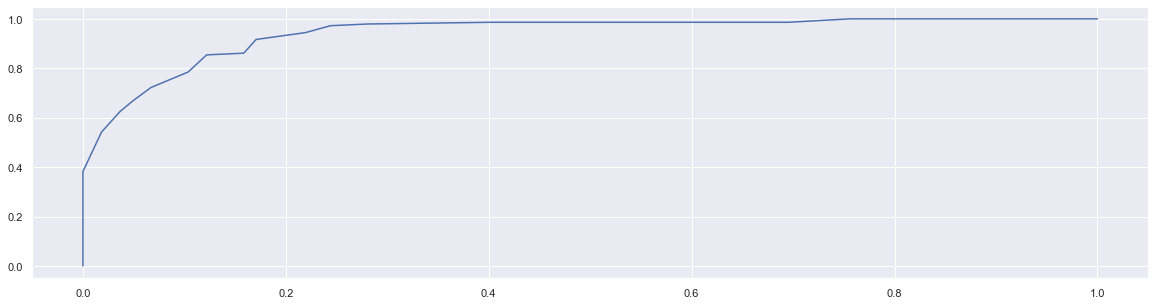

In [147]:
plt.plot(fpr, tpr)

In [148]:
roc_auc_score(y_test, nprob1)

0.9418402777777778

In [149]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(scaled_X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
final_test_pred=model1.predict(scaled_X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(y_test,final_test_pred))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test,final_test_pred))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.9772727272727273
Confusion Metrix:
 [[160   4]
 [  3 141]]


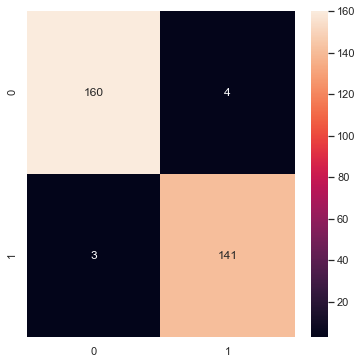

In [150]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, final_test_pred), annot=True, fmt='d')
plt.show()

In [151]:
score_knn=accuracy_score(final_test_pred,y_test)

In [152]:
# Roc curve
## TPR, FPR, Threshold
from sklearn.metrics import roc_auc_score, roc_curve
m_prob1 = model1.predict_proba(scaled_X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,m_prob1 )

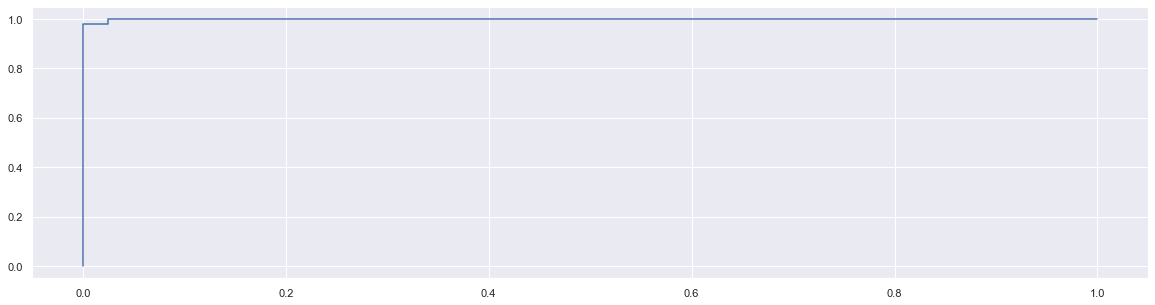

In [153]:
plt.plot(fpr, tpr)

In [154]:
roc_auc_score(y_test, m_prob1)

0.9994918699186992

### I got final accuracy for logistic regression as   84.4%
### I got final accuracy for  as  K Neighbors Classifier 97.7%
### I got final accuracy for logistic regression as   Gausian Naive Bayes 80.4%

# Visualizing the models by plotting the graph to find the best one

In [155]:
scores = [score_lr,score_nb,score_knn]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors"]   
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 0.8441558441558441 %
The accuracy score achieved using Naive Bayes is: 0.8084415584415584 %
The accuracy score achieved using K-Nearest Neighbors is: 0.9772727272727273 %


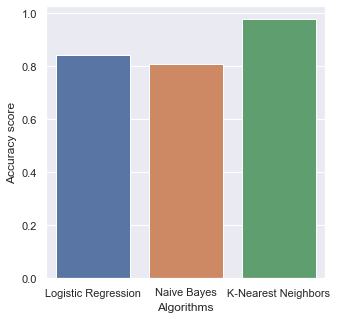

In [156]:
plt.figure(figsize=(5,5))
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)
plt.show()

### Machine Learning algorithms used are:

  1. Logistic Regression (Scikit-learn)
  2. Naive Bayes (Scikit-learn)
  3. K-Nearest Neighbours (Scikit-learn)

Thus preventing Heart diseases has become more than necessary. Good data-driven systems for predicting heart diseases can improve the entire research and prevention process, making sure that more people can live healthy lives. This is where Machine Learning comes into play. Machine Learning helps in predicting the Heart diseases, and the predictions made are quite accurate.

The project involved analysis of the heart disease patient dataset with proper data processing. Then, different models were trained and and predictions are made with different algorithms KNN, Decision Tree, Random Forest,Logistic Regression etc This is the jupyter notebook code and dataset I've used for my Kaggle kernel.

I've used a variety of Machine Learning algorithms, implemented in Python, to predict the presence of heart disease in a patient. This is a classification problem, with input features as a variety of parameters, and the target variable as a binary variable, predicting whether heart disease is present or not.

### Highest Accuracy achieved: 97.7% (K-Nearest Neighbours)

### Hence the Best model for this project is K-Nearest Neighbours.